## Lab Assignment 6 -- Regression
In this lab, you will complete an exercises related to the lecture material on regression. Then, you will compete with your fellow classmates to see who can best predict housing prices.

**IMPORTANT:** Before submitting, make sure you restart the kernel and run all cells sequentially. After all cells have executed, then save the file for submission.  This is very important for grading.

In [1]:
# Don't change this line
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
np.random.seed(35)

## Exercise 1 -- Generating & Analyzing Fake Data
In this exercise, we will generate some fake data as we did in the lecture on regression trees. Then, we will use it on a series of regression problems.

## Exercise 1a -- Generating the Data
Complete the following steps:
1. Define a function called `generate_data` that takes two arguments, an integer `n` and a boolean `square`. `square` should have a default argument of `False`.
2. Generate an array called `X` and set it equal to `np.random.randn((n,1))`. This creates an $n$-vector of [**standard normal random variables**](https://en.wikipedia.org/wiki/Normal_distribution).
3. Turn `X` into an $nx2$ array by concatenating it with an $n$-vector of ones (**Hint**: use `np.ones((n,1))` and `np.concatenate()`). Make sure that the array of ones serves as the first column.
3. Define an array called `beta` and set it equal to the array [1, 3.14]
4. Define a variable called `epsilon` and set it equal to `np.random.randn(n)*0.3`
5. Then, using `X`, `beta`, and `epsilon`, create a variable named `y` which is equal to
    - `np.matmul(X, beta) + epsilon` if square is `False`
    - `np.matmul(X ** 2, beta) + epsilon` if `square` is `True`.
    
6. Your output should return `X`and `y`
7. Test your function in the cell below with `n=100` and no argument for `square`. Save the output to `X100` and `y100` respectively. Afterwards, print `y100[50]`.

Answer the following questions in the Markdown cell below:
1. Is this a bivariate or multivariate linear regression model? Why?
2. What is the purpose of  including this `epsilon`? What aspect of real data are we trying to mimic?

In [2]:
# Exercise 1a -- Test function and print

def generate_data(n, square = False):
  X = np.random.randn(n,1)
  X = np.concatenate([np.ones((n, 1)), X], axis=1)
  beta = np.array([1, 3.14])
  epsilon = np.random.randn(n)*0.3

  if square == False:
    y = np.matmul(X, beta) + epsilon
  else:
    y = np.matmul(X ** 2, beta) + epsilon

  return X, y

X100, y100 = generate_data(100)

print(y100[50])


-2.855072207243597


### Reponse to Exercise 1a

1. This is a bivariate linear regression model.The response variable `y` is modeled as a linear function of two features including `X` and `beta` and `X` is determined by `n`.

2. Its purpose is to represent random error in the data and mimic the imperfections and variability in real data.

## Exercise 1b -- Standard Linear Regression
Using `sklearn`, fit a linear regression model on `y100` and `X100`. When intializing your model, set `fit_intercept` equal to `False` and call your linear model `lr_model_1`. Then, print the estimated coefficients and answer the following question in the Markdown cell below.
- What are the coefficient estimates? What values are they close to? Why does this make sense?



In [3]:
# Exercise 1b -- fit regression
from sklearn import linear_model
fit_intercept = False
lr_model_1 = linear_model.LinearRegression(fit_intercept=False)
lr_model_1 .fit(X100, y100)

# print the coefficients
print("Estimated coefficients:", lr_model_1.coef_)

Estimated coefficients: [1.01335663 3.18589237]


In [4]:
# lr_model_1.intercept_

### Response to Exercise 1b
The estimated coefficients should be close to the values [1, 3.14]. Because we defined beta as [1, 3.14] in the `generate_data function`. The variable `y` was generated using this and the relationship between` X` and `y` should follow the linear relationship.

## Exercise 1c -- Linear Regression with Quadratic Terms
Using `generate_data(100, True)`, create two variables `y100_2` and `X100_2`. Then, repeat the steps from **Exercise 1b** above using `X100_2` and `y100_2` instead of `X_100` and `y_100`.  Call your new model `linear_model_2`.

Answer the following questions in the Markdown cell below:

1. What are the coefficient estimates? Are they similar to the coefficients from **Exercise 1b**? Why or why not?

If your estimates were not similar, create a variable `X100_2_sq` in the third cell below that can be used instead of `X100_2` so that your estimates are similar again. Repeat the same process again but call your `lr_model_3`. Print your new estimated coefficients.

In the markdown cell below, answer the following question:

2. How did you modify `X100_2` to attain similar coefficients? Why did this work?

In [5]:
# Exercise 1c -- generate variables and repeat regression fit
X100_2 , y100_2 = generate_data(100, True)

fit_intercept = False
linear_model_2 = linear_model.LinearRegression(fit_intercept=False)
linear_model_2 .fit(X100_2, y100_2)

print(linear_model_2.coef_)

[3.96585832 0.83947215]


### Response to Exercise 1c -- Question 1
The coefficient estimates are [4 1]and they are not similar to those from `lr_model_1`. Because `y100_2` was generated using `X ** 2`, but the `linear_model_2 `was fitted using `X`.

In [6]:
# Exercise 1c -- modify X100_2 and run new regression
X100_2_sq = X100_2 ** 2

fit_intercept = False
lr_model_3 = linear_model.LinearRegression(fit_intercept=False)
lr_model_3 .fit(X100_2_sq, y100_2)

print(lr_model_3.coef_)

[0.99205242 3.11570564]


### Response to Exercise 1c -- Quesiton 2
 I modify `X100_2` to `X100_2 ** 2` to attain similar coefficients because this aligns with the regression equation when square equals true.

### Exercise 1d -- Unnecessary Quadratic Terms
Now we are going to see what happens when we estimate a model that only has linear terms using both linear and quadratic terms. Complete the following steps:
1. Create an $nx3$ array called `X100_ext` by concatenating `X100` with a column that is equal to the square of elements in the second column. Make sure this new column is the third column. Note that `np.concatenate` requires that both arrays are of the same dimension. You may have to use the method [`.reshape()`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).
2. Now repeat the steps of **Exercise 1b** with `X100_ext`. Make sure you print the estimated coefficients.

Answer the following questions in the Markdown cell below:
1. Are the first two coefficients different from their respective counterparts in part **Exercise 1b**? Why do you think this is?
2.  Is the third coeffcient close to 0 or large? Why do you think this is?
3. Do you think these estimates are accurate?

In [7]:
# Exercise 1d -- Create X100_ext here
X100_ext = np.concatenate([X100, (X100[:, 1:] ** 2).reshape(-1, 1)], axis=1)


In [8]:
# Exercise 1d -- Repeat exercise 1b here
fit_intercept=False
lr_model_4 = linear_model.LinearRegression(fit_intercept=False)

lr_model_4.fit(X100_ext, y100)

print(lr_model_4.coef_)

[ 1.02282831  3.18470138 -0.00810062]


### Response to Exercise 1d
1. The first two coefficients are approximately [1, 3.18]slightly different from their respective counterparts in Exercise 1b. In Exercise 1b, the coefficients were closer to [1, 3.14]. Because the model is now including an additional explanatory variable.

2. The third coefficient is close to 0. This is because the quadratic term in X100_ext does not significantly contribute to the variabley100.

3. The estimates are reasonably accurate. The first two coefficients are close to their true values [1, 3.14], indicating the linear relationship . The third coefficient close to 0 aligns with the fact that the data generation did not include a quadratic term.

## Exercise 1e -- Regression Plots
Following the notes in the plotting lectures complete the following steps:
1. Using `subplots()` initialize a figure with 4 figures in a $2x2$ grid
2. Plot the following in the indicated location.
    - **Top-left**  -- a line plot of `lr_model_1` and a scatter plot of the data used to generate `lr_model_1`.
    - **Bottom-left**  -- a line plot of `lr_model_2` and a scatter plot of the data used to generate `lr_model_2`
    - **Bottom-right** -- a line plot of `lr_model_3` and a scatter plot of the data used to generate `lr_model_3`
    - **Top-right** -- a line plot of `lr_model_4` and a scatter plot of the data used to generate `lr_model_4`
    
For the plots above,
- make your lines red,
- title your plots (e.g. "Linear Model 1"),
- use `np.linspace(-4,4,200)` as your domain when plotting the lines,
- call `fig.tight_layout()` so your plot is not cluttered

3. Using the `metrics` submodule of `sklearn`, print the `in-sample` mean squared errors of each model using f strings. Your stings should looke like this: "MSE of Linear Model 1 is .3"  
**Hints:** .
- To plot on the top left axis, you will need to work with `axes.flat[0]` . The remaining axes are indexed by 1, 2, and 3.
- If you choose to used the `.predict()` to plot your lines, keep in mind you need to provide it with the correctly shaped input.
- When calculating the means within a loop, it may hep to create a list that contains the four linear models.


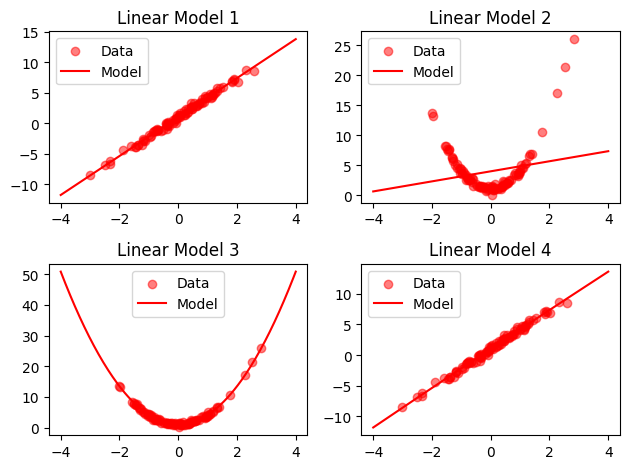

In [9]:
# Exercise 1e -- plots
x_values = np.linspace(-4, 4, 200).reshape(-1,1)
X_values = np.concatenate([np.ones_like(x_values), x_values], axis=1)
X_values_sq = np.concatenate([np.ones_like(x_values), x_values**2], axis=1)
X_values_ext = np.concatenate([np.ones_like(x_values), x_values, x_values**2], axis=1)

y1 = lr_model_1.predict(X_values)
y2 = linear_model_2.predict(X_values)
y3 = lr_model_3.predict(X_values_sq)
y4 = lr_model_4.predict(X_values_ext)

fig, axes = plt.subplots(2, 2)

# linear model 1
axes.flat[0].scatter(X100[:, 1], y100, color='red', alpha=0.5, label='Data')
axes.flat[0].plot(x_values, y1, color='red', label='Model')
axes.flat[0].set_title("Linear Model 1")
axes.flat[0].legend()

# linear model 2
axes.flat[1].scatter(X100_2[:, 1], y100_2, color='red', alpha=0.5, label='Data')
axes.flat[1].plot(x_values, y2, color='red', label='Model')
axes.flat[1].set_title("Linear Model 2")
axes.flat[1].legend()

# linear model 3
axes.flat[2].scatter(X100_2[:, 1], y100_2, color='red', alpha=0.5, label='Data')
axes.flat[2].plot(x_values, y3, color='red', label='Model')
axes.flat[2].set_title("Linear Model 3")
axes.flat[2].legend()

#linear model 4
axes.flat[3].scatter(X100[:, 1], y100, color='red', alpha=0.5, label='Data')
axes.flat[3].plot(x_values, y4, color='red', label='Model')
axes.flat[3].set_title("Linear Model 4")
axes.flat[3].legend()

fig.tight_layout()


In [10]:
# Exercise 1e -- mean squared errors
from sklearn import metrics
models = [lr_model_1, linear_model_2, lr_model_3, lr_model_4]
data = [(X100, y100), (X100_2, y100_2), (X100_2_sq, y100_2), (X100_ext, y100)]

for i, (model, (X, y)) in enumerate(zip(models, data), 1):
    y_re = model.predict(X)
    mse = metrics.mean_squared_error(y, y_re)
    print(f"MSE of Linear Model {i} is {mse:.3f}")

MSE of Linear Model 1 is 0.100
MSE of Linear Model 2 is 15.667
MSE of Linear Model 3 is 0.093
MSE of Linear Model 4 is 0.099


### Exercise 1f -- Functional Misspecification
**Functional Misspecification** is used to describe the situation where the functional form of the regression model we are estimating is not the same as the functional form of the true data generating process. Answer the following question in the markdown cell below:
- Which of the four linear models do you think are well-specified? Which ones are not? Is including extra terms problematic when it comes to being well-specified. What about excluding the terms found in the true data generating process?
- How does misspecification manifest itself in the plots? How about in the mean squared errors?
- After doing this exercise, do you think it is important to investigate the relationship between variables before determining your regression specification? Why or why not?

### Response to Exercise 1f
1. linear model 1 ,3 and 4 are well-specified and linear model 2 is not.Including extra terms (model 4)is not necessarily problematic. Excluding terms found in the true data generating process (model 2) is problematic. It leads to poor fit and increases the mean squared error.
2. Misspecified models (model 2) show poor alignment between the model prediction line and the actual data .And misspecified models have higher MSE, indicating a poorer fit to the data.
3. Yes, proper investigation helps us determine our regression specification better.Correct specification contributes to lower MSEs and better alignment in plots.

### Exercise 1g -- Lasso
Finally, we will run lasso on our fake data. Complete the following steps:
1. Generate `X1000` and `y1000` using `generate_data(1000)`
2. Create an `1000x3` array called `X1000_ext` which is created in a anaglous fashion to `X100_ext`.
3. Follow the lecture notes to create a standardized version of `X1000_ext` called `X1000_ext_scl`. You will need to import the `preprocessing` submodule of sklearn.
4. Check to make sure your means and variances. You should see that everything looks good except for our intercept has a variance of $0$. You actually do not want to standardize an intercept but we still need it! Replace the first column of  `X1000_ext_scl` with a fresh column of ones using `np.ones(1000)`.
5. Create a dataframe version of `X1000_ext_scl` called `X_lasso_df` and rename the columns to "intercept", "x", and "x_sq" respectively.Then call `X_lasso_df` at the bottom of the cell.
6. Copy and paste the Lasso path code from the lecture notes into the second cell below. Adapt it so it works for `X_lasso_df` and `y1000`.


In the Markdown cell below, answer the following questions:
1. Characterize `X_sq`'s lasso path. Why was this behavior predictable?    Reference linear model 4 or the true DGP in your answer.
2. Without checking, do you think a low or high value for alpha would be chosen by cross validation? To help you answer this question, think about what the true coefficients are and whether or not higher alphas bring the lasso coefficients closer to their true counterparts or farther away.

In [11]:
# Exercise 1g -- Steps 1-5
X1000, y1000 = generate_data(1000)

X1000_ext = np.concatenate([X1000, (X1000[:, 1:] ** 2).reshape(-1, 1)], axis=1)

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X1000_ext_scl = scaler.fit_transform(X1000_ext)


X1000_ext_scl[:, 0] = np.ones(1000)

X_lasso_df = pd.DataFrame(X1000_ext_scl, columns=["intercept", "x", "x_sq"])
X_lasso_df


,intercept,x,x_sq
0,1.0,-0.524930,-0.524031
1,1.0,1.552270,0.992600
2,1.0,-0.654974,-0.400776
3,1.0,-1.091785,0.201461
4,1.0,-0.239695,-0.704329
...,...,...,...
995,1.0,-1.243026,0.477589
996,1.0,-0.430610,-0.597340
997,1.0,0.615512,-0.503483
998,1.0,-0.621270,-0.435188


In [12]:
# from sklearn.linear_model import Lasso, lasso_path
# alphas, coefs, _ = lasso_path(X_lasso_df, y1000)

# plt.figure(figsize=(10, 6))
# for coef, feature in zip(coefs, X_lasso_df.columns):
#     plt.plot(-np.log10(alphas), coef, label=feature)
# plt.xlabel('-Log(alpha)')
# plt.ylabel('Coefficients')
# plt.title('Lasso Paths')
# plt.legend()
# plt.show()

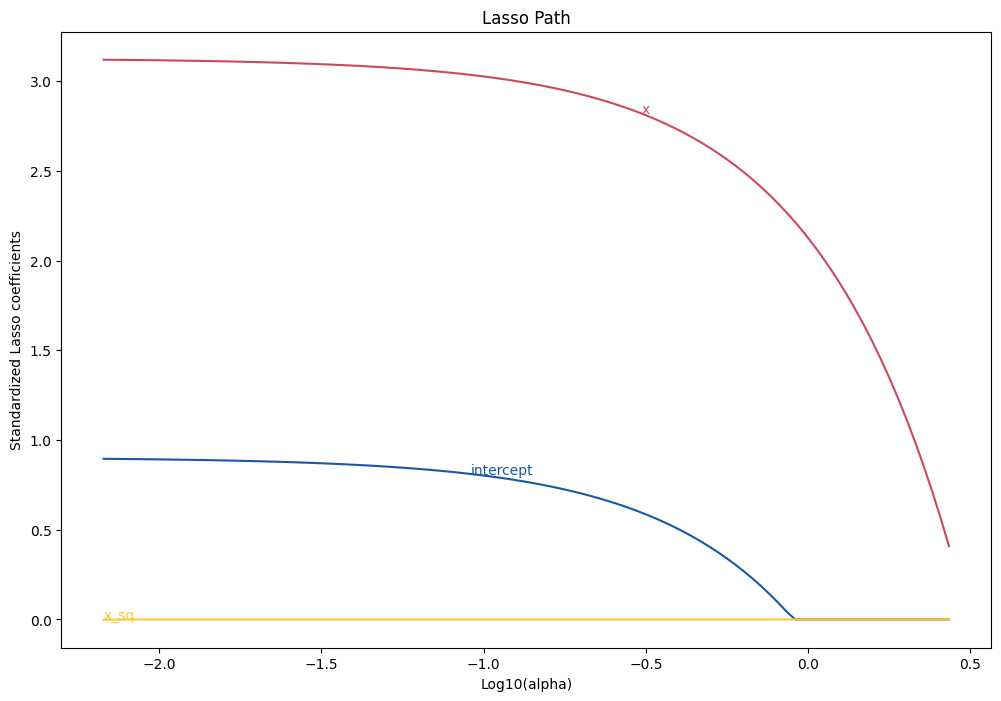

In [13]:
# Exercise 1g -- Step 5 copy code here
from itertools import cycle
colors = ['#165aa7', '#cb495c', '#fec630', '#bb60d5', '#f47915', '#06ab54', '#002070', '#b27d12', '#007030']
alphas = np.exp(np.linspace(-5, 1, 100))
alphas, coefs_lasso, _ = linear_model.lasso_path(X1000_ext_scl, y1000,  alphas=alphas, max_iter=1000000)

# plotting
fig, ax = plt.subplots(figsize=(12, 8))
color_cycle = cycle(colors)
log_alphas = np.log10(alphas)
for coef_l, c, name in zip(coefs_lasso, color_cycle, list(X_lasso_df.columns)):
   ax.plot(log_alphas, coef_l, c=c)
   ax.set_xlabel('Log10(alpha)')
   ax.set_ylabel('Standardized Lasso coefficients')
   ax.set_title('Lasso Path')
   ax.axis('tight')
   maxabs = np.max(np.abs(coef_l))
   i = [idx for idx in range(len(coef_l)) if abs(coef_l[idx]) >= (0.9*maxabs)][0]
   xnote = log_alphas[i]
   ynote = coef_l[i]
   ax.annotate(name, (xnote, ynote), color=c)


plt.show()


1. The lasso path of ` x_sq`  will likely show that its coefficient decreases more rapidly as alpha increases compared to the intercept and x term. This is predictable because in linear model 4 ` x_sq` provided a better fit and true DGP includes a quadratic term, meaning x_sq has an impact on y.

2. A low value for alpha would be chosen because lower alphas minimize the bias , allowing the coefficients to be closer to their true values.Too High alphas may shrink the coefficients too much, making them further away from true values.